#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

#Loading Data

In [ ]:
#Read in data

df = pd.read_csv('Data Analyst - Test Data - US.csv')

In [ ]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [ ]:
df.shape

(6448, 3)

#Performing Exploratory Data Analysis


In [ ]:
#EDA
df['Review'].isnull().sum()

55

There are 55 null values in Review column

In [ ]:
#Remove null Values from the Review column
df.dropna(subset=['Review'], inplace=True)

In [ ]:
df['Review'].isnull().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(6393, 3)

In [ ]:
df.describe()

,Review,date,Location
count,6393,6393,1705
unique,6384,403,1078
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [ ]:
df['id'] = range(1,len(df)+1)

In [ ]:
!pip install translate

In [ ]:
from translate import Translator

translator = Translator(to_lang="en")

# Define a function to translate text to English
def translate_to_english(text):
    try:
        translation = translator.translate(text)
        return translation
    except Exception as e:
        print(f"Translation error: {e}")
        return text

# Apply translation to the 'Review' column
df['Review'] = df['Review'].apply(translate_to_english)

# Display the updated DataFrame
print(df['Review'])

0       I was very impressed with the resort.\n Great ...
1       The rooms were nice the outside needs work als...
2       Great location! I have stayed at this hotel on...
3       The hotel was adequate for my stay. The strips...
4       Great location, room was large and spacious. P...
                              ...                        
6443    ·the staff were all so friendly. frank, the ch...
6444           ·the internet barely worked or didn't work
6445    ·the location was great.\n \n \n \n \n ·the be...
6446    ·we were early for check in and the staff was ...
6447    ·staff, free coffee, location and activities.\...
Name: Review, Length: 6448, dtype: object


In [ ]:
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [ ]:
df['Review'] = df['Review'].str.replace('Read more', '').str.replace('Read less', '')

In [ ]:
df

,Review,date,Location,id
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,1
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,2
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,3
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,4
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,5
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America,6389
6444,·the internet barely worked or didn't work,2019/07/12,United States of America,6390
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America,6391
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America,6392


#  It seems data is related to some Hotel and we have to analyse the sentiment of the customers over a period of time.

In [ ]:
#
!pip install wordcloud

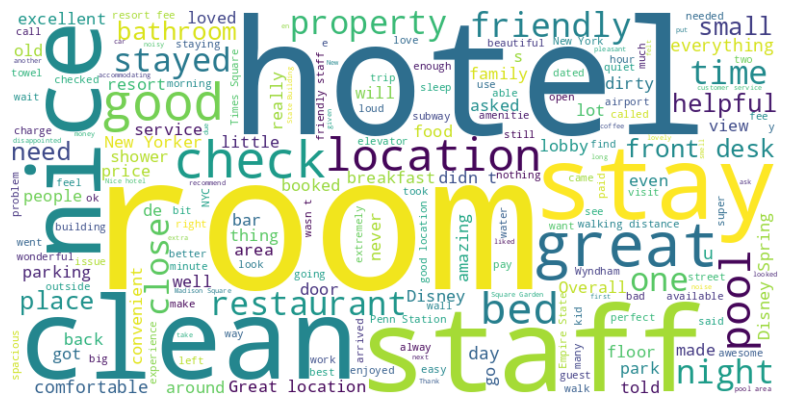

In [ ]:
from wordcloud import WordCloud

# Assuming your DataFrame is already loaded and named 'df'

# Combine all reviews into a single string
all_reviews = ' '.join(df['Review'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Words which are most common in each review.

#VADER

In [ ]:
nltk.download("punkt")
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
def clean_review(text):
    sentences = tokenizer.tokenize(text)
    cleaned_sentences = [sentence for sentence in sentences if "Read more" not in sentence and "Read less" not in sentence]
    return " ".join(cleaned_sentences)

df["Review"] = df["Review"].apply(clean_review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
example = df['Review'][50]
tokens = nltk.word_tokenize(example)

tokens[:10]

['L',
 '’',
 'unica',
 'cosa',
 'accettabile',
 'è',
 'stata',
 'la',
 'cortesia',
 'ricevuta']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.pos_tag(tokens)

[('L', 'NNP'),
 ('’', 'NNP'),
 ('unica', 'JJ'),
 ('cosa', 'NN'),
 ('accettabile', 'IN'),
 ('è', 'NNP'),
 ('stata', 'NN'),
 ('la', 'NN'),
 ('cortesia', 'NN'),
 ('ricevuta', 'NN'),
 ('al', 'RB'),
 ('check', 'VB'),
 ('out', 'RP'),
 ('.', '.'),
 ('Tutto', 'NNP'),
 ('il', 'JJ'),
 ('resto', 'NN'),
 ('da', 'NN'),
 ('cancellare', 'NN'),
 ('.', '.'),
 ('Camera', 'NNP'),
 ('vecchia', 'NN'),
 (',', ','),
 ('male', 'NN'),
 ('insonorizzata', 'NNS'),
 ('mobili', 'VBP'),
 ('vecchi', 'JJ'),
 ('e', 'NN'),
 ('maltenuti', 'NN'),
 (',', ','),
 ('illuminazione', 'NN'),
 ('fatta', 'NN'),
 ('malissimo', 'NN'),
 ('e', 'NN'),
 (',', ','),
 ('nonostante', 'JJ'),
 ('tutto', 'NN'),
 ('abbiamo', 'NN'),
 ('faticato', 'VBD'),
 ('a', 'DT'),
 ('farcela', 'NN'),
 ('assegnare', 'NN'),
 ('.', '.'),
 ('La', 'NNP'),
 ('prima', 'JJ'),
 ('camera', 'NN'),
 ('che', 'NN'),
 ('abbiamo', 'JJ'),
 ('ricevuto', 'NN'),
 ('è', 'NNP'),
 ('al', 'VBZ'),
 ('piano', 'NN'),
 ('della', 'NN'),
 ('strada', 'JJ'),
 ('con', 'NN'),
 ('i', 'NN'),


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so Happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
# Function to get sentiment polarity
def get_polarity(text):
    scores = sia.polarity_scores(str(text))
    return scores['compound'], scores['neu'], scores['neg'], scores['pos']

# Apply sentiment analysis to the 'Review' column
df[['Compound_Polarity','Neutral_Polarity', 'Negative_Polarity', 'Positive_Polarity']] = df['Review'].apply(get_polarity).apply(pd.Series)


In [ ]:
df.head()

,Review,date,Location,id,Compound_Polarity,Neutral_Polarity,Negative_Polarity,Positive_Polarity
0,I was very impressed with the resort. Great st...,2019/08/20,Sebastian,1,0.9421,0.607,0.000,0.393
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,2,0.8360,0.546,0.075,0.379
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,3,0.6588,0.761,0.000,0.239
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,4,0.3634,0.817,0.077,0.107
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,5,0.9260,0.471,0.000,0.529


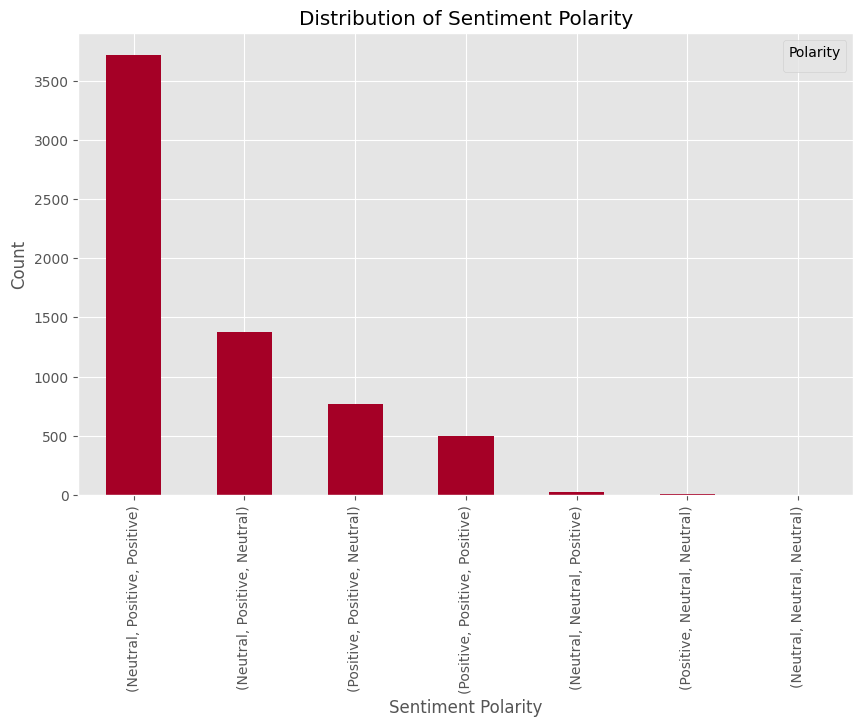

In [ ]:
# Count the occurrences of different polarity categories
polarity_counts = df[['Negative_Polarity','Neutral_Polarity', 'Positive_Polarity']].apply(lambda x: pd.cut(x, bins=[-1, -0.1, 0.1, 1], labels=['Negative','Neutral', 'Positive'])).value_counts().transpose()

# Plot a stacked bar chart
ax = polarity_counts.plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sentiment Polarity')

# Display the legend
ax.legend(title='Polarity')

# Show the plot
plt.show()

#RoBerta Model for Sentiment Analysis

Scores are deduced in Three categories:

*   Positive
*   Neutral
*   Negative


In [ ]:
from transformers import AutoTokenizer

In [ ]:
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
example = df['Review'][1]
print(example)
sia.polarity_scores(example)

The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok


{'neg': 0.075, 'neu': 0.546, 'pos': 0.379, 'compound': 0.836}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.014086014, 'roberta_neu': 0.0996274, 'roberta_pos': 0.8862866}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict['roberta_neg'],scores_dict['roberta_neu'],scores_dict['roberta_pos']


In [ ]:
df

,Review,date,Location,id,Compound_Polarity,Neutral_Polarity,Negative_Polarity,Positive_Polarity
0,I was very impressed with the resort. Great st...,2019/08/20,Sebastian,1,0.9421,0.607,0.000,0.393
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,2,0.8360,0.546,0.075,0.379
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,3,0.6588,0.761,0.000,0.239
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,4,0.3634,0.817,0.077,0.107
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,5,0.9260,0.471,0.000,0.529
...,...,...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America,6389,0.9716,0.828,0.000,0.172
6444,·the internet barely worked or didn't work,2019/07/12,United States of America,6390,0.0000,1.000,0.000,0.000
6445,·the location was great. ·the bed was the most...,2019/07/10,United States of America,6391,0.2975,0.650,0.145,0.205
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America,6392,0.0000,1.000,0.000,0.000


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['id']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/6393 [00:00<?, ?it/s]

Broke for id 522
Broke for id 669
Broke for id 946
Broke for id 1720
Broke for id 2126
Broke for id 4084
Broke for id 4321


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index([               'id',                   0,                   1,
                         2,            'Review',              'date',
                'Location', 'Compound_Polarity',  'Neutral_Polarity',
       'Negative_Polarity', 'Positive_Polarity'],
      dtype='object')

In [ ]:
results_df

,id,0,1,2,Review,date,Location,Compound_Polarity,Neutral_Polarity,Negative_Polarity,Positive_Polarity
0,1,0.001458,0.006748,0.991795,I was very impressed with the resort. Great st...,2019/08/20,Sebastian,0.9421,0.607,0.000,0.393
1,2,0.014086,0.099627,0.886287,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,0.8360,0.546,0.075,0.379
2,3,0.001043,0.021846,0.977111,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,0.6588,0.761,0.000,0.239
3,4,0.689485,0.243226,0.067289,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,0.3634,0.817,0.077,0.107
4,5,0.001193,0.014519,0.984288,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,0.9260,0.471,0.000,0.529
...,...,...,...,...,...,...,...,...,...,...,...
6381,6389,0.008567,0.069295,0.922138,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America,0.9716,0.828,0.000,0.172
6382,6390,0.854191,0.136270,0.009540,·the internet barely worked or didn't work,2019/07/12,United States of America,0.0000,1.000,0.000,0.000
6383,6391,0.287789,0.341941,0.370270,·the location was great. ·the bed was the most...,2019/07/10,United States of America,0.2975,0.650,0.145,0.205
6384,6392,0.003107,0.072055,0.924838,·we were early for check in and the staff was ...,2019/07/10,United States of America,0.0000,1.000,0.000,0.000


In [ ]:
results_df = results_df.rename(columns={0: 'Negative', 1: 'Neutral', 2: 'Positive'})

In [ ]:
results_df.head()

,id,Negative,Neutral,Positive,Review,date,Location,Compound_Polarity,Neutral_Polarity,Negative_Polarity,Positive_Polarity
0,1,0.001458,0.006748,0.991795,I was very impressed with the resort. Great st...,2019/08/20,Sebastian,0.9421,0.607,0.000,0.393
1,2,0.014086,0.099627,0.886287,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,0.8360,0.546,0.075,0.379
2,3,0.001043,0.021846,0.977111,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,0.6588,0.761,0.000,0.239
3,4,0.689485,0.243226,0.067289,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,0.3634,0.817,0.077,0.107
4,5,0.001193,0.014519,0.984288,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,0.9260,0.471,0.000,0.529


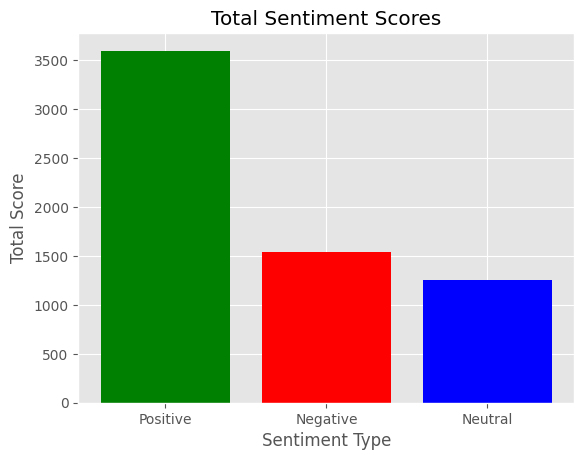

In [ ]:

import matplotlib.pyplot as plt

# Assuming df is your DataFrame
positive_sum = results_df['Positive'].sum()
negative_sum = results_df['Negative'].sum()
neutral_sum = results_df['Neutral'].sum()

# Data for plotting
sentiments = ['Positive', 'Negative', 'Neutral']
totals = [positive_sum, negative_sum, neutral_sum]

# Plotting
plt.bar(sentiments, totals, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment Type')
plt.ylabel('Total Score')
plt.title('Total Sentiment Scores')
plt.show()



# Total sentiment score for Positive is higher than negative and neutral reviews.

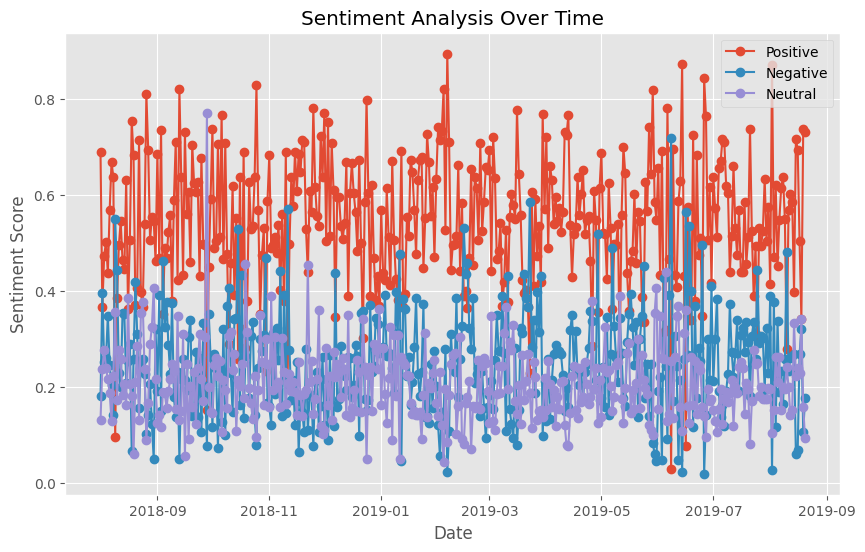

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with 'Date', 'Positive', 'Negative', 'Neutral' columns
# Replace with your actual column names

# Convert the 'Date' column to datetime format
results_df['date'] = pd.to_datetime(results_df['date'])

# Group by date and calculate the mean sentiment scores
daily_sentiments = results_df.groupby('date')[['Positive', 'Negative', 'Neutral']].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Line plot for each sentiment type
plt.plot(daily_sentiments.index, daily_sentiments['Positive'], label='Positive', marker='o')
plt.plot(daily_sentiments.index, daily_sentiments['Negative'], label='Negative', marker='o')
plt.plot(daily_sentiments.index, daily_sentiments['Neutral'], label='Neutral', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()


* This shows over a period of time overall customers sentiment are postive.

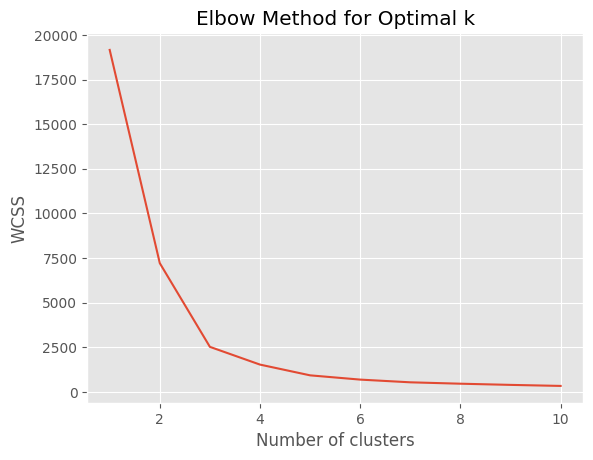

                                                 Review  Cluster
0     I was very impressed with the resort. Great st...        1
1     The rooms were nice the outside needs work als...        1
2     Great location! I have stayed at this hotel on...        1
3     The hotel was adequate for my stay. The strips...        0
4     Great location, room was large and spacious. P...        1
...                                                 ...      ...
6381  ·the staff were all so friendly. frank, the ch...        1
6382         ·the internet barely worked or didn't work        0
6383  ·the location was great. ·the bed was the most...        2
6384  ·we were early for check in and the staff was ...        1
6385  ·staff, free coffee, location and activities. ...        0

[6386 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with sentiment scores
# Replace with your actual column names
sentiment_columns = ['Positive', 'Negative', 'Neutral']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(results_df[sentiment_columns])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for Within-Cluster-Sum-of-Squares
plt.show()

# Based on the Elbow method, choose the optimal number of clusters and perform K-means clustering
optimal_k = 3  # You may choose the number of clusters based on the plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
results_df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the clustered data
print(results_df[['Review', 'Cluster']])


In [ ]:
results_df.columns

Index(['id', 'Negative', 'Neutral', 'Positive', 'Review', 'date', 'Location',
       'Compound_Polarity', 'Neutral_Polarity', 'Negative_Polarity',
       'Positive_Polarity', 'Cluster'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


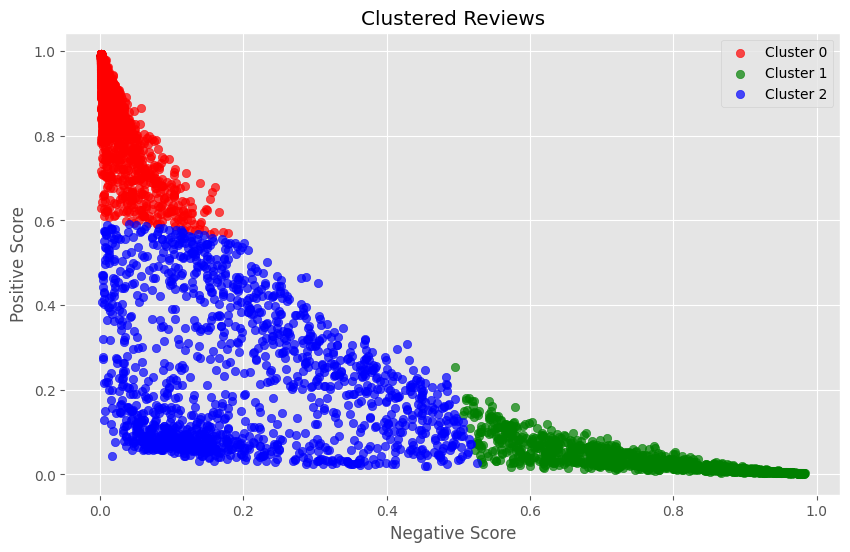

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have 'Negative', 'Neutral', and 'Positive' columns
# Replace these with the actual column names in your DataFrame
data = results_df[['Negative', 'Neutral', 'Positive']]

# Fit k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
results_df['Cluster'] = kmeans.fit_predict(data)

# Plot the clustered points
plt.figure(figsize=(10, 6))

colors = {0: 'red', 1: 'green', 2: 'blue'}  # Assign colors for each cluster

for cluster_id, color in colors.items():
    cluster_data = results_df[results_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Negative'], cluster_data['Positive'], c=color, label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Clustered Reviews')
plt.xlabel('Negative Score')
plt.ylabel('Positive Score')
plt.legend()
plt.show()





*   There are more data points in positive score cluster which indicates the Customers are Happy and Satisfied with the services offered.
*   Number of Negative score datapoints are low in numbers means overall less number of customer are dissatisfied and want improvements.



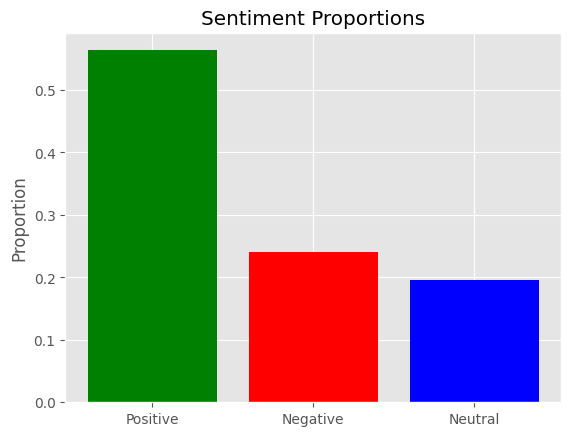

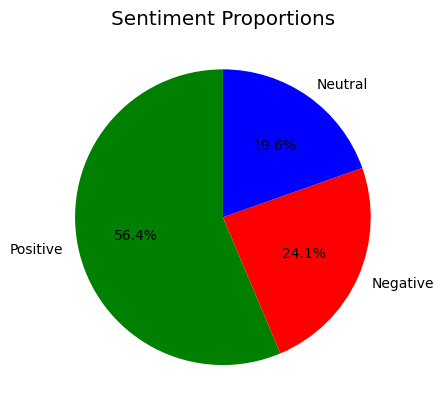

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Positive', 'Negative', 'Neutral'
colors = ['green', 'red', 'blue']
sentiments = ['Positive', 'Negative', 'Neutral']

# Calculate the proportions
proportions = results_df[['Positive', 'Negative', 'Neutral']].sum() / len(results_df)

# Create a bar plot
plt.bar(sentiments, proportions, color=colors)
plt.title('Sentiment Proportions')
plt.ylabel('Proportion')
plt.show()

# Alternatively, create a pie chart
plt.pie(proportions, labels=sentiments, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Proportions')
plt.show()


#Insights:



*Positive Dominance:*

  * The fact that positive sentiments constitute the majority, accounting for 56.4%, suggests that a significant portion of customers has a favorable view of the services or products.
  * It implies that the majority of customers are content, satisfied, or pleased with their experiences.

*Moderate Negative Sentiment:*

  * While positive sentiments are prevalent, the presence of 24.1% negative sentiments indicates that there is room for improvement.
  * Identifying and addressing the concerns expressed in negative reviews could lead to a more balanced sentiment distribution.

Neutral Sentiments:

* The proportion of neutral sentiments at 19.6% suggests that a portion of customers may be indifferent or have mixed feelings.
Investigating the reasons behind neutral sentiments can help uncover areas that may not be strongly positive but also not explicitly negative.

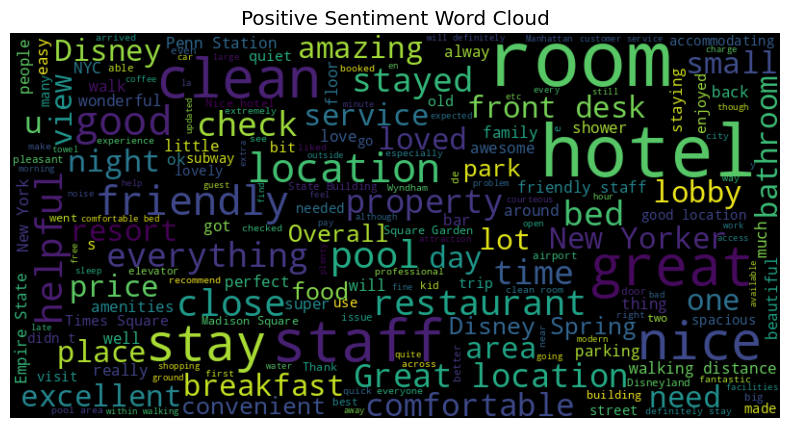

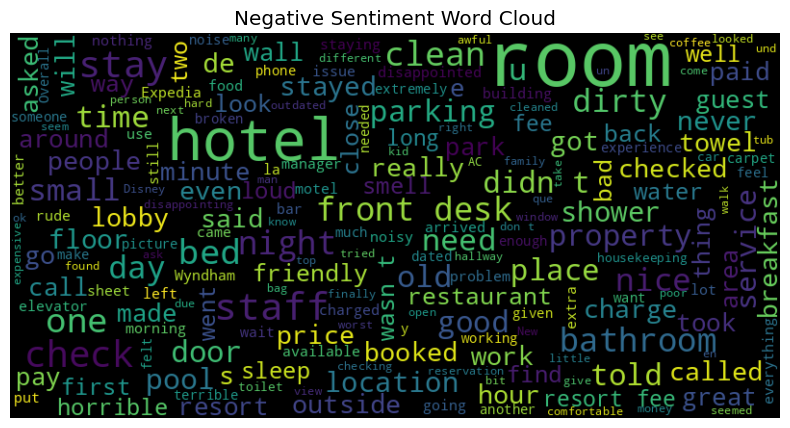

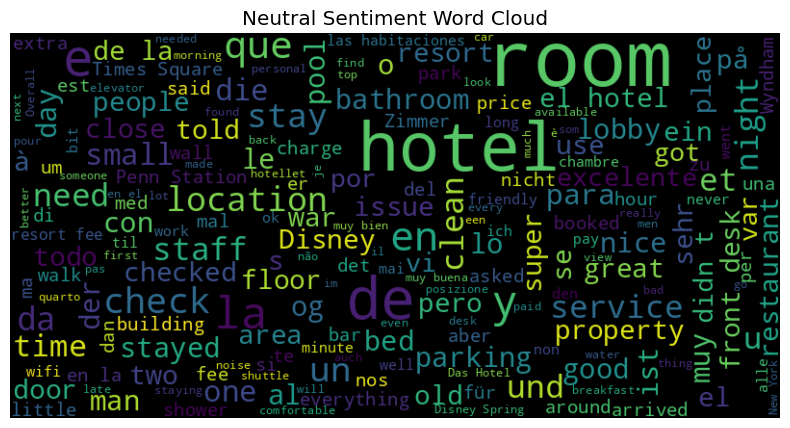

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Review' and 'Positive/Negative/Neutral'
positive_reviews = results_df[results_df['Positive'] > results_df['Negative']][['Review']]
negative_reviews = results_df[results_df['Negative'] > results_df['Positive']][['Review']]
neutral_reviews = results_df[results_df['Neutral'] > results_df[['Positive', 'Negative']].max(axis=1)][['Review']]

# Function to generate and plot word cloud
def plot_wordcloud(reviews, title):
    text = ' '.join(reviews['Review'])
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=80).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and plot word clouds for each sentiment
plot_wordcloud(positive_reviews, 'Positive Sentiment Word Cloud')
plot_wordcloud(negative_reviews, 'Negative Sentiment Word Cloud')
plot_wordcloud(neutral_reviews, 'Neutral Sentiment Word Cloud')


#Insights

Positive Sentiment Word Cloud Analysis:


*   The wordcloud for positive sentiment is filled with uplifting words like "amazing," "clean," "great," "location," "excellent," "comfortable," and "friendly," reflecting an overwhelmingly positive sentiment towards the hotel.
*   Customers express satisfaction with the hotel's cleanliness, location, excellent service, and friendly staff, emphasizing the positive impact of these aspects on overall guest experience.
*  The hotel's geographical positioning is a significant positive factor for customers.







Negative sentiment Word Cloud Analysis:

* The words"Dirty", "Small","Horrible","Terrible","Noise","Loud","Old" and "Toilet" are showing negatives sentiments.

*   The negative sentiment cloud underscores the urgency of addressing cleanliness issues. Implement rigorous cleaning protocols and inspections to ensure a hygienic environment.
*   Identify and rectify sources of noise disturbances to enhance the quality of guests' sleep and overall stay.
*  Evaluate the need for renovations to modernize facilities and address concerns about outdated amenities.



***Actionable Steps:***

<p>Prioritize addressing specific issues highlighted in negative reviews to improve overall sentiment.
Analyze neutral sentiments to identify aspects that could be enhanced to shift customer perceptions toward the positive.</p>

***Continuous Feedback:***

Encourage customers to provide feedback and reviews regularly to maintain an up-to-date understanding of sentiment trends.
Implement mechanisms to respond to customer feedback promptly, demonstrating a commitment to customer satisfaction.